In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, LabelEncoder

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split


# 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.

# 또한, cross_val_score 함수에는 KFold의 매개변수를 제어할 수가 없으므로, 

# 따로 KFold 객체를 만들고 매개변수를 조정한 다음에 cross_val_score의 cv 매개변수에 넣어야 한다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, make_scorer, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
import sklearn.metrics as metrics

In [3]:
train = pd.read_csv('./train.csv')

# 1. EDA

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 독립변수, 종속변수 정리

- Feature(X, 독립 변수)

    1. pclass = 티켓의 등급 ( 1, 2, 3 )
    1. sex = 성별
    1. age = 나이
    1. sibsp = 동승한 형제 자매 / 배우자 수
    1. parch = 동승한 부모 / 자식 수
    1. fare = 요금
    1. embarked = 승선항
        - S = Southampton
        - Q = Queenstown
        - C = Cherbourg
    

- Target

    1. survived = 생존 여부 ( 0 = 사망, 1 = 생존 )

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.drop("PassengerId", axis = 1, inplace = True)

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.shape

(891, 11)

In [10]:
# 수치형 데이터 확인 ( 기술통계량값 출력으로 )

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# 범주형 데이터 확인 

train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taussig, Mrs. Emil (Tillie Mandelbaum)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


# 2. 데이터 전환

## 2-1. 결측치 확인

In [12]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Value Ratio' :train_na})
missing_data.head(20)

,Missing Value Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


Text(0.5, 1.0, 'Ratio of missing values')

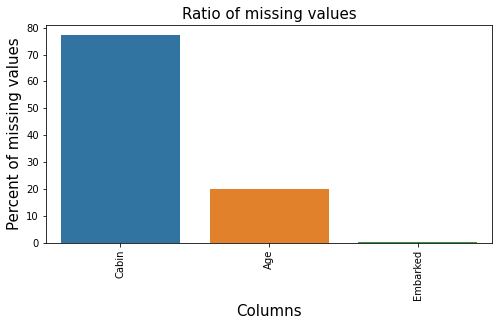

In [13]:
f, ax = plt.subplots(figsize=(8, 4))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Ratio of missing values', fontsize=15)

In [14]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
# 1. Embarked 결측치 전처리

train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# 결측치가 2개, 빈도수 가장 많은 S로 대체

train["Embarked"] = train["Embarked"].fillna("S")

In [17]:
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# 2. Age 결측치 전처리

train["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [19]:
import numpy as np

mean = train['Age'].mean()        # age 의 mean 값을 구함
std =  train['Age'].std()        # age 의 std 값을 구함
size = train['Age'].isna().sum()        # age 에 nan 값이 몇개인지를 구함 


rand_age = np.random.randint(mean-std, mean+std, size)    # mean 에서 std 만큼 떨어져 있는 랜덤한 값들을 size 만큼 반환

print(rand_age)

[22 39 35 32 39 37 25 30 23 21 17 16 32 15 17 24 24 35 19 15 19 32 26 33
 32 32 30 36 15 33 25 16 40 39 15 25 30 38 16 42 35 32 24 31 32 30 18 31
 36 37 16 25 38 39 36 15 28 43 18 26 34 32 18 22 36 25 34 43 18 38 34 18
 24 28 36 26 35 16 33 28 28 32 34 21 25 41 27 39 24 16 15 18 41 32 32 43
 31 21 41 16 25 39 24 39 31 39 41 32 21 25 28 21 27 29 37 28 28 37 28 24
 17 20 31 34 17 21 22 31 19 42 27 31 39 38 15 40 24 37 27 28 42 30 28 22
 34 25 41 37 34 27 29 21 25 26 34 37 33 33 42 39 31 26 34 25 19 32 34 26
 29 30 23 36 43 21 15 21 42]


In [20]:
# 기존 'Age'열 중 비어있는 값에 난수생성으로 만든 rand_age를 차례로 넣기

train['Age'].loc[train['Age'].isna()] = rand_age

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
train["Age"].value_counts()

24.00    38
28.00    35
25.00    34
21.00    33
18.00    32
         ..
36.50     1
70.50     1
55.50     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [22]:
# 3. Cabin 결측치 전처리

train["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F33            3
              ..
F G63          1
E49            1
C111           1
A26            1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [23]:
train.drop('Cabin', axis = 1, inplace = True)

In [24]:
# 모든 결측치 제거

train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## 2-2. 새로운 변수 추가.

- 나이가 30세 미만인 사람은 0
- 30세 이상, 50세 미만인 사람은 1 
- 50세 이상인 사람은 2의 값을 갖는 열 Age_ind 추가

In [25]:
train['Age_ind'] = train['Age']
train.loc[train['Age_ind'] < 11, 'Age_ind'] = 0
train.loc[(train['Age_ind'] >= 11) & (train['Age_ind'] <= 18), 'Age_ind'] = 1
train.loc[(train['Age_ind'] > 18) & (train['Age_ind'] <= 22), 'Age_ind'] = 2
train.loc[(train['Age_ind'] > 22) & (train['Age_ind'] <= 27), 'Age_ind'] = 3
train.loc[(train['Age_ind'] > 27) & (train['Age_ind'] <= 33), 'Age_ind'] = 4
train.loc[(train['Age_ind'] > 33) & (train['Age_ind'] <= 40), 'Age_ind'] = 5
train.loc[(train['Age_ind'] > 40) & (train['Age_ind'] <= 66), 'Age_ind'] = 6
train.loc[(train['Age_ind'] > 66) , 'Age_ind'] = 7
train['Age_ind'] = train['Age_ind'].astype(int)

In [26]:
train['FamilySize'] = train['SibSp'] + train['Parch']
train['FamilySize_ind'] = train['FamilySize']
train.loc[train['FamilySize_ind'] == 0, 'FamilySize_ind'] = 0
train.loc[(train['FamilySize_ind'] == 1) | (train['FamilySize_ind'] == 2), 'FamilySize_ind'] = 1
train.loc[(train['FamilySize_ind'] == 3), 'FamilySize_ind'] = 2
train.loc[(train['FamilySize_ind'] == 4) | (train['FamilySize_ind'] == 5), 'FamilySize_ind'] = 3
train.loc[(train['FamilySize_ind'] == 6), 'FamilySize_ind'] = 4
train.loc[(train['FamilySize_ind'] == 7) | (train['FamilySize_ind'] == 10), 'FamilySize_ind'] = 5
train['FamilySize_ind'] = train['FamilySize_ind'].astype(int)

## 3. 변수별 시각화

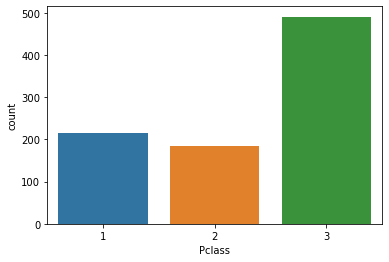

In [27]:
# 각 클래스별 승객의 수

sns.countplot(x = 'Pclass', data = train)

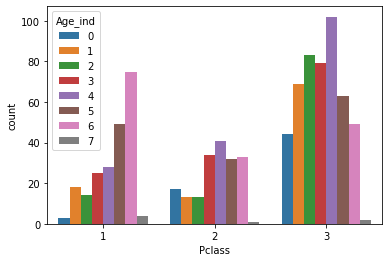

In [28]:
# 클래스별 승객나이 분포

sns.countplot(data=train, x='Pclass', hue='Age_ind')

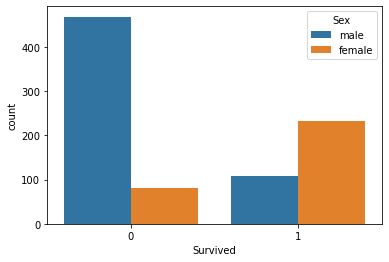

In [29]:
sns.countplot(x ='Survived',hue = 'Sex', data = train)

# 여성 생존율이 더 높음.

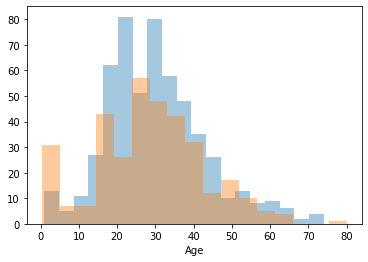

In [30]:
sns.distplot(train.Age.loc[train['Survived'] == 0], kde = False)
sns.distplot(train.Age.loc[train['Survived'] == 1], kde = False)

# 빨간색이 생존자

# 연령대가 낮은 10대 초반의 생존율이 더 낮은 것을 확인, 80세 이상의 노인도 생존율이 높은 것을 확인.

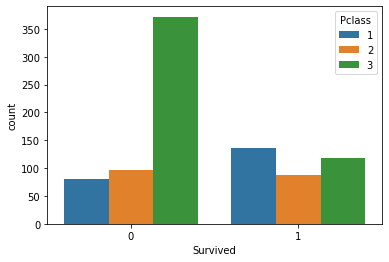

In [31]:
sns.countplot(x = train.Survived, hue = train.Pclass, data = train)    # sns(우선되는 기준 열, hue = 비교하려는 열) 

# Pclass3 에서 사망율이 가장 높음.

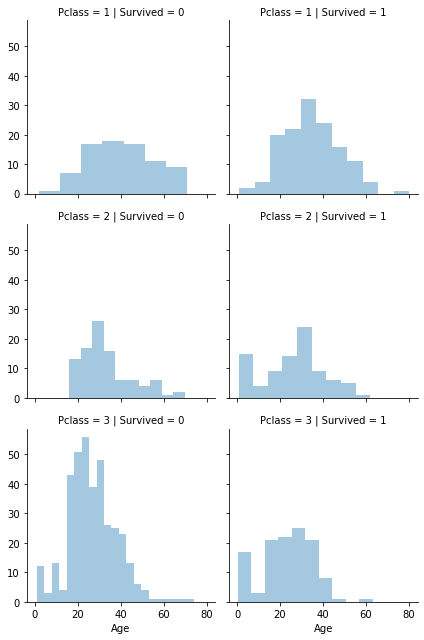

In [32]:
# Pclass와 생존여부, 연령과의 관계

grid = sns.FacetGrid(train, col= 'Survived', row = 'Pclass')
grid.map(sns.distplot, 'Age', kde = False)

# Pclass가 1등급일수록 생존율이 높고, Pclass3의 저연령대의 사망률이 가장 높음.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


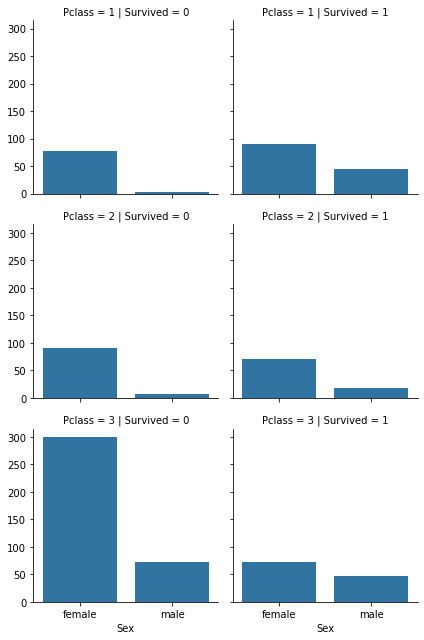

In [33]:
# Pclass와 생존여부. 성별간의 관계

grid = sns.FacetGrid(train, col= 'Survived', row = 'Pclass')
grid.map(sns.countplot, 'Sex')

# 모든 Pclass에 여성 생존자의 생존율이 높고, Pclass3의 사망률이 가장 높음.

In [34]:
train['FamilySize'] = train['SibSp'] + train['Parch']

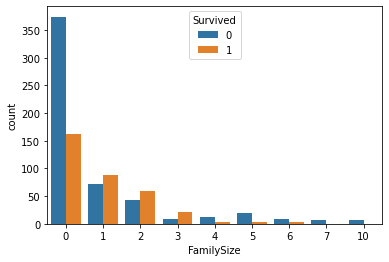

In [35]:
# 가족수가 1~3명 이상이면 생존율이 높음.

sns.countplot('FamilySize', hue = 'Survived', data = train)

In [36]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_ind,FamilySize,FamilySize_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,5,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5,0,0


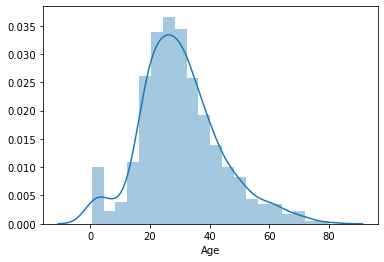

In [37]:
# 성별이 남자일 때의 연령분포

sns.distplot(train['Age'].loc[train['Sex'] == 'male'])

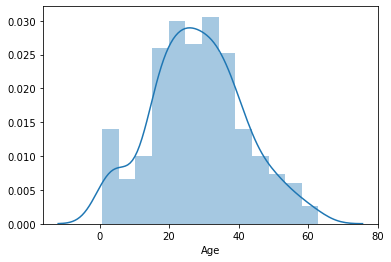

In [38]:
# 성별이 여자일 때의 연령분포

sns.distplot(train['Age'].loc[train['Sex'] == 'female'])

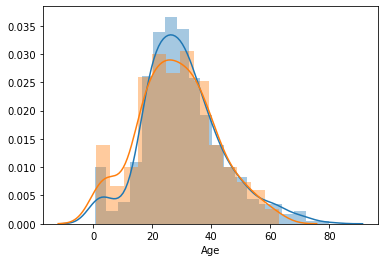

In [39]:
# 남녀 나이대별 분포 비교

sns.distplot(train['Age'].loc[train['Sex'] == 'male'])
sns.distplot(train['Age'].loc[train['Sex'] == 'female'])

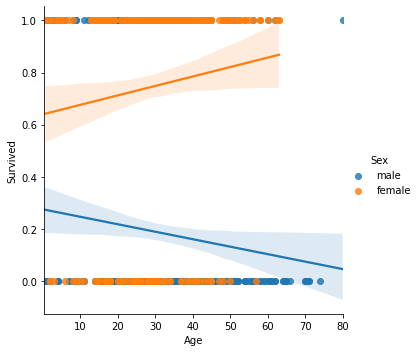

In [40]:
# 남성의 경우 나이가 많을수록(80에 가까울수록) 사망자 (Y축이 0에 가까움)가 많음.
# 여성의 경우 나이가 많을수록 생존자( Y축이 1에 가까움)가 많음.

sns.lmplot('Age', 'Survived', hue = 'Sex', data = train)

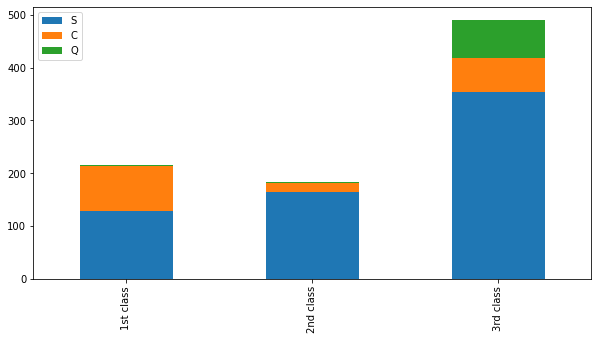

In [41]:
# 항구별로 승선하는 Pclass 등급비율

Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

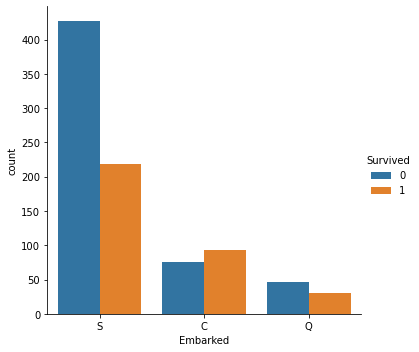

In [42]:
# 항구와 사망*생존율간의 관계

sns.catplot('Embarked', kind = 'count', hue = 'Survived', data = train)

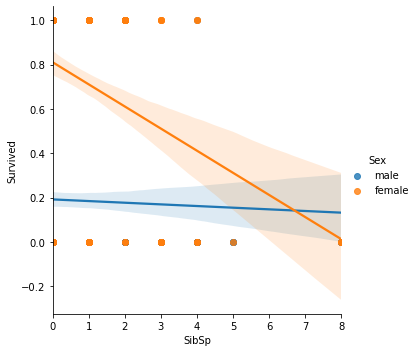

In [43]:
# 여성의 경우 형제*자매가 많을수록 사망률이 증가.

sns.lmplot('SibSp', 'Survived', hue = 'Sex', data = train)

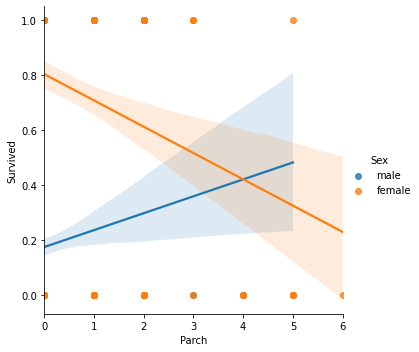

In [44]:
# 부모가 자식이 많을수록 여성의 경우엔 사망률이 높고, 남자의 경우 생존율이 높음.

sns.lmplot('Parch', 'Survived', hue = 'Sex', data = train)

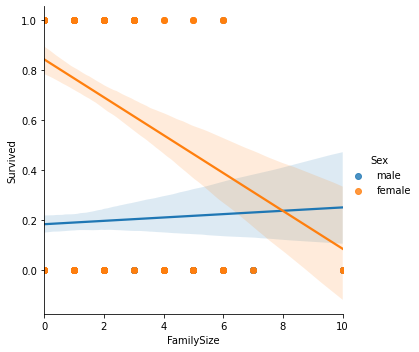

In [45]:
# 총 가족수가 많을수록 여성의 경우엔 사망률이 높고, 남자의 경우 생존율이 높음.

sns.lmplot('FamilySize', 'Survived', hue = 'Sex', data = train)

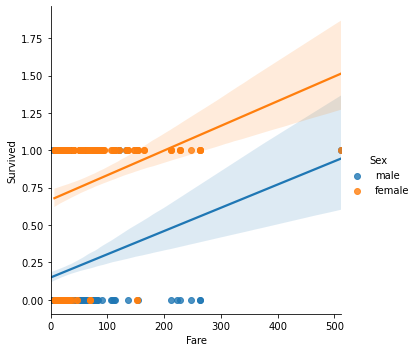

In [46]:
# 티켓값이 높을수록 남녀 상관없이 사망률이 낮음.

sns.lmplot('Fare', 'Survived', hue = 'Sex', data = train)

In [47]:
train_corr = train.corr()

(9.5, -0.5)

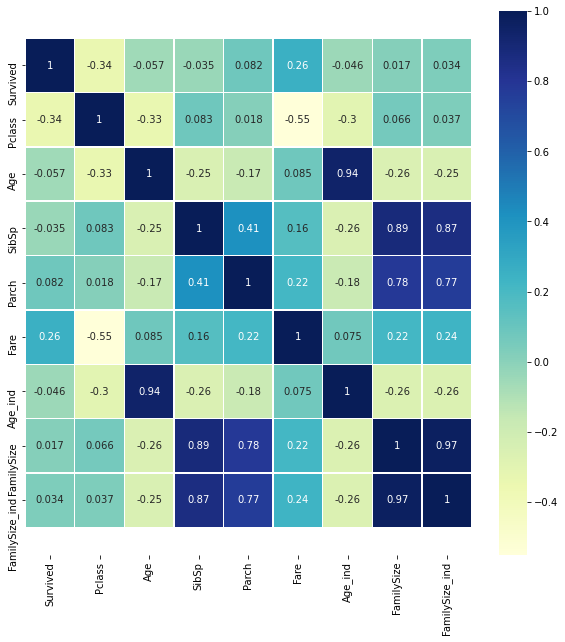

In [48]:
# 히트맵으로 상관계수 표현

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(train_corr,
            cmap = 'YlGnBu',
            xticklabels = train_corr.columns.values,
           yticklabels = train_corr.columns.values,
           annot = True, linewidths = .5, ax = ax)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values


### 생존여부와 상관관계 있는 변수

- Possitive

    1. Fare : 0.23
    
---
- Negative
    
    1. Pclass : -0.26 (등급이 낮을수록 Pclass값이 올라가기 때문에 음의 상관관계)
    1. Age_ind : -0.14 (고연령일수록 Age_ind값이 올라가기 때문에 음의 상관관계)

# ---

In [49]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_ind,FamilySize,FamilySize_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,5,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5,0,0


## Name 변수의 Mr, Mrs ... 등등 기혼유무에 따른 생존율 시각화(정규표현식 활용)

In [50]:
train_copy = train.copy()

In [51]:
train_copy['New'] = train_copy['Name'].str.replace(r'\([^)]*\)', '').str.strip()

In [52]:
train_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_ind,FamilySize,FamilySize_ind,New
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1,"Braund, Mr. Owen Harris"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,5,1,1,"Cumings, Mrs. John Bradley"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,0,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5,1,1,"Futrelle, Mrs. Jacques Heath"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5,0,0,"Allen, Mr. William Henry"


In [53]:
# 판다스의 정규표현식 함수를 이용하여 Mr, Miss, Mrs, Miss, Master 단어를 추출.

train_copy['Title'] = train_copy.New.str.extract(' ([A-Za-z]+)\.', expand=False)

In [54]:
train_copy['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Don           1
Lady          1
Mme           1
Sir           1
Countess      1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [55]:
# 상위 4개를 제외한 나머지는 Rare라는 변수로 합쳐서 표현.

train_copy['Title'] = train_copy['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',\
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],\
                                             'Rare')
train_copy['Title'] = train_copy['Title'].replace('Mlle', 'Miss')
train_copy['Title'] = train_copy['Title'].replace('Ms', 'Miss')
train_copy['Title'] = train_copy['Title'].replace('Mme', 'Mrs')

In [56]:
train_copy['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

# 4. 머신러닝 학습을 위한 변수변환

In [57]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_ind,FamilySize,FamilySize_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,5,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5,0,0


In [58]:
train_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_ind,FamilySize,FamilySize_ind,New,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1,"Braund, Mr. Owen Harris",Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,5,1,1,"Cumings, Mrs. John Bradley",Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,0,"Heikkinen, Miss. Laina",Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5,1,1,"Futrelle, Mrs. Jacques Heath",Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5,0,0,"Allen, Mr. William Henry",Mr


In [59]:
train['Title'] = train_copy['Title']

In [60]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_ind,FamilySize,FamilySize_ind,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,5,1,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5,1,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5,0,0,Mr


In [61]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [62]:
# 요금을 더미변수로 만들기 위해 구간별로 나눠줌.

train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3

In [63]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_ind,FamilySize,FamilySize_ind,Title,FareBand,Fare_cat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1,Mr,"(-0.001, 7.91]",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,5,1,1,Mrs,"(31.0, 512.329]",3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,0,Miss,"(7.91, 14.454]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5,1,1,Mrs,"(31.0, 512.329]",3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,5,0,0,Mr,"(7.91, 14.454]",1


In [64]:
# 더미변수 생성

df1 = pd.get_dummies(train['Pclass'], prefix = 'Pclass' ,drop_first=True)
df2 = pd.get_dummies(train['Sex'], prefix = 'Sex', drop_first=True)
df3 = pd.get_dummies(train['Embarked'], prefix = 'Embarked', drop_first=True)
df4 = pd.get_dummies(train['Age_ind'], prefix = 'Age_ind', drop_first=True)
df5 = pd.get_dummies(train['Fare_cat'], prefix = 'Fare_cat', drop_first=True)
df7 = pd.get_dummies(train['Title'], prefix = 'Title', drop_first=True)
df8 = pd.get_dummies(train['FamilySize_ind'], prefix = 'FamilySize_ind', drop_first=True)

In [65]:
train = pd.concat([train, df1, df2, df3, df4, df5, df7, df8 ], axis=1 )
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Fare_cat_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize_ind_1,FamilySize_ind_2,FamilySize_ind_3,FamilySize_ind_4,FamilySize_ind_5
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,...,0,0,1,0,0,1,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,...,1,0,0,1,0,1,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,...,0,1,0,0,0,0,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,...,1,0,0,1,0,1,0,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,...,0,0,1,0,0,0,0,0,0,0


In [66]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_ind', 'FamilySize', 'FamilySize_ind', 'Title',
       'FareBand', 'Fare_cat', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Age_ind_1', 'Age_ind_2', 'Age_ind_3',
       'Age_ind_4', 'Age_ind_5', 'Age_ind_6', 'Age_ind_7', 'Fare_cat_1',
       'Fare_cat_2', 'Fare_cat_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'FamilySize_ind_1', 'FamilySize_ind_2',
       'FamilySize_ind_3', 'FamilySize_ind_4', 'FamilySize_ind_5'],
      dtype='object')

In [67]:
# 더미변수와 유의미한 독립변수를 제외한 나머지 제거.

train.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_ind', 'FamilySize', 'FamilySize_ind',
       'Title', 'FareBand', 'Fare_cat'], axis=1, inplace=True)
train.head()

,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_ind_1,Age_ind_2,Age_ind_3,Age_ind_4,...,Fare_cat_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize_ind_1,FamilySize_ind_2,FamilySize_ind_3,FamilySize_ind_4,FamilySize_ind_5
0,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# 5. 모델링

In [68]:
y = train['Survived']
y.shape

(891,)

In [69]:
X = train.drop('Survived', axis=1)
X.shape

(891, 24)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [71]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(712, 24), 테스트 세트 Shape:(179, 24)
 학습 세트 레이블 값 분포 비율
0    0.616573
1    0.383427
Name: Survived, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.614525
1    0.385475
Name: Survived, dtype: float64


In [72]:
# logistic

log_cl =  LogisticRegression(n_jobs = -1)
log_cl.fit(X_train, y_train)
log_cl_pred = log_cl.predict(X_test)

log_cl_cv_pre = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
log_cl_cv_rec = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
log_cl_cv_f1 = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for rbf logistic is ', metrics.precision_score(log_cl_pred, y_test))
print('Recall for rbf logistic is ', metrics.recall_score(log_cl_pred, y_test))
print('F1_score for rbf logistic is ', metrics.f1_score(log_cl_pred, y_test))
print()
print('The cross validated precision for logistic is:', log_cl_cv_pre.mean())
print('The cross validated recall for logistic is:', log_cl_cv_rec.mean())
print('The cross validated f1_score for logistic is:', log_cl_cv_f1.mean())

Precision for rbf logistic is  0.7246376811594203
Recall for rbf logistic is  0.8620689655172413
F1_score for rbf logistic is  0.7874015748031497

The cross validated precision for logistic is: 0.7648212978647762
The cross validated recall for logistic is: 0.73994708994709
The cross validated f1_score for logistic is: 0.7494977471770486


In [73]:
# Random forest

rf_cl = RandomForestClassifier(n_jobs = -1)
rf_cl.fit(X_train, y_train)
rf_cl_pred = rf_cl.predict(X_test)

rf_cl_cv_pre = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
rf_cl_cv_rec = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
rf_cl_cv_f1 = cross_val_score(rf_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for random forest is ', metrics.precision_score(rf_cl_pred, y_test))
print('Recall for random forest is ', metrics.recall_score(rf_cl_pred, y_test))
print('F1_score for random forest is ', metrics.f1_score(rf_cl_pred, y_test))
print()
print('The cross validated precision for random forest is:', rf_cl_cv_pre.mean())
print('The cross validated recall for random forest is:', rf_cl_cv_rec.mean())
print('The cross validated f1_score for random forest is:', rf_cl_cv_f1.mean())

Precision for random forest is  0.7391304347826086
Recall for random forest is  0.8947368421052632
F1_score for random forest is  0.8095238095238095

The cross validated precision for random forest is: 0.7600497228119731
The cross validated recall for random forest is: 0.7145502645502646
The cross validated f1_score for random forest is: 0.7376668533174047


In [74]:
# KNN 군집분석

knn_model=KNeighborsClassifier() 
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)

knn_model_cv_pre = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
knn_model_cv_rec = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
knn_model_cv_f1 = cross_val_score(log_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for KNN is ', metrics.precision_score(knn_model_pred, y_test))
print('Recall for KNN is ', metrics.recall_score(knn_model_pred, y_test))
print('F1_score for KNN is ', metrics.f1_score(knn_model_pred, y_test))
print()
print('The cross validated precison for KNN is:', knn_model_cv_pre.mean())
print('The cross validated recall for KNN is:', knn_model_cv_rec.mean())
print('The cross validated f1_score for KNN is:', knn_model_cv_f1.mean())

Precision for KNN is  0.7681159420289855
Recall for KNN is  0.8833333333333333
F1_score for KNN is  0.8217054263565893

The cross validated precison for KNN is: 0.7648212978647762
The cross validated recall for KNN is: 0.73994708994709
The cross validated f1_score for KNN is: 0.7494977471770486


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


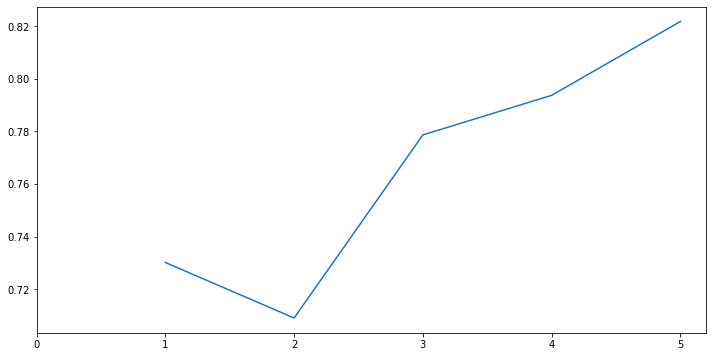

Accuracies for different values of n are: [0.73015873 0.70909091 0.77862595 0.79365079 0.82170543] with the max value as  0.8217054263565893


In [75]:
# KNN 하이퍼파라미터에 따른 F1_Score 차이 보기

a_index = list(range(1,6))
a = pd.Series()
x = [0,1,2,3,4,5]
for i in list(range(1,6)):
    knn_model = KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(X_train, y_train)
    knn_model_pred = knn_model.predict(X_test)
    a=a.append(pd.Series(metrics.f1_score(knn_model_pred, y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [76]:
# Bagged DecisionTree

ba_dt_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100, n_jobs=-1)
ba_dt_model.fit(X_train, y_train)
ba_dt_model_pred = ba_dt_model.predict(X_test)

ba_dt_model_cv_pre = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
ba_dt_model_cv_rec = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
ba_dt_model_cv_f1 = cross_val_score(ba_dt_model, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Bagged DecisionTree is ', metrics.precision_score(ba_dt_model_pred, y_test))
print('Recall for Bagged DecisionTree is ', metrics.recall_score(ba_dt_model_pred, y_test))
print('F1_score for Bagged DecisionTree is ', metrics.f1_score(ba_dt_model_pred, y_test))
print()
print('The cross validated precision for Bagged DecisionTree is:', ba_dt_model_cv_pre.mean())
print('The cross validated recall for Bagged DecisionTree is:', ba_dt_model_cv_rec.mean())
print('The cross validated f1_score for Bagged DecisionTree is:', ba_dt_model_cv_f1.mean())

Precision for Bagged DecisionTree is  0.7246376811594203
Recall for Bagged DecisionTree is  0.8771929824561403
F1_score for Bagged DecisionTree is  0.7936507936507936

The cross validated precision for Bagged DecisionTree is: 0.7544430059085231
The cross validated recall for Bagged DecisionTree is: 0.707010582010582
The cross validated f1_score for Bagged DecisionTree is: 0.7285913695899676


In [77]:
# AdaBoost (Adaptive boosting)

ada_cl = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1)
ada_cl.fit(X_train, y_train)
ada_cl_pred = ada_cl.predict(X_test)

ada_cl_cv_pre = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
ada_cl_cv_rec = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
ada_cl_cv_f1 = cross_val_score(ada_cl, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for AdaBoost is ', metrics.precision_score(ada_cl_pred, y_test))
print('Recall for rbf AdaBoost is ', metrics.recall_score(ada_cl_pred, y_test))
print('F1_score for rbf AdaBoost is ', metrics.f1_score(ada_cl_pred, y_test))
print()
print('The cross validated precision for AdaBoost is:', ada_cl_cv_pre.mean())
print('The cross validated recall for AdaBoost is:', ada_cl_cv_rec.mean())
print('The cross validated f1_score for AdaBoost is:', ada_cl_cv_f1.mean())

Precision for AdaBoost is  0.6956521739130435
Recall for rbf AdaBoost is  0.8571428571428571
F1_score for rbf AdaBoost is  0.7679999999999999

The cross validated precision for AdaBoost is: 0.7737798723016114
The cross validated recall for AdaBoost is: 0.7107142857142859
The cross validated f1_score for AdaBoost is: 0.7385313533542904


In [78]:
# Gradient Boost

gr_grad = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1)
gr_grad.fit(X_train, y_train)
gr_grad_pred = gr_grad.predict(X_test)

gr_grad_cv_pre = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
gr_grad_cv_rec = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
gr_grad_cv_f1 = cross_val_score(gr_grad, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Gradient Boost is ', metrics.precision_score(gr_grad_pred, y_test))
print('Recall for Gradient Boost is ', metrics.recall_score(gr_grad_pred, y_test))
print('F1_score for Gradient Boost is ', metrics.f1_score(gr_grad_pred, y_test))
print()
print('The cross validated precision for Gradient Boost is:', gr_grad_cv_pre.mean())
print('The cross validated recall for Gradient Boost is:', gr_grad_cv_rec.mean())
print('The cross validated f1_score for Gradient Boost is:', gr_grad_cv_f1.mean())

Precision for Gradient Boost is  0.7246376811594203
Recall for Gradient Boost is  0.8620689655172413
F1_score for Gradient Boost is  0.7874015748031497

The cross validated precision for Gradient Boost is: 0.7841812969639057
The cross validated recall for Gradient Boost is: 0.6994708994708996
The cross validated f1_score for Gradient Boost is: 0.7378386568302535


In [79]:
# XGBoost

xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.1)
xgb_model.fit(X_train,y_train)
xgb_model_pred = xgb_model.predict(X_test)

xgb_model_cv_pre = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
xgb_model_cv_rec = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
xgb_model_cv_f1 = cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for XGBoost is ', metrics.precision_score(xgb_model_pred, y_test))
print('Recall for XGBoost is ', metrics.recall_score(xgb_model_pred, y_test))
print('F1_score for XGBoost is ', metrics.f1_score(xgb_model_pred, y_test))
print()
print('The cross validated prediction for XGBoost is:', xgb_model_cv_pre.mean())
print('The cross validated recall for XGBoost is:', xgb_model_cv_rec.mean())
print('The cross validated f1_score for XGBoost is:', xgb_model_cv_f1.mean())

Precision for XGBoost is  0.6956521739130435
Recall for XGBoost is  0.8888888888888888
F1_score for XGBoost is  0.7804878048780488

The cross validated prediction for XGBoost is: 0.8034747474747475
The cross validated recall for XGBoost is: 0.707010582010582
The cross validated f1_score for XGBoost is: 0.7510686183403006


In [80]:
# Light GBM

lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
lgbm_clf.fit(X_train, y_train)
lgbm_clf_pred = lgbm_clf.predict(X_test)

lgbm_clf_cv_pre = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'precision', n_jobs=-1)
lgbm_clf_cv_rec = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'recall', n_jobs=-1)
lgbm_clf_cv_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv = 10, scoring = 'f1', n_jobs=-1)

print('Precision for Light GBM is ', metrics.precision_score(lgbm_clf_pred, y_test))
print('Recall for Light GBM is ', metrics.recall_score(lgbm_clf_pred, y_test))
print('F1_score for Light GBM is ', metrics.f1_score(lgbm_clf_pred, y_test))
print()
print('The cross validated precision for Light GBM is:', lgbm_clf_cv_pre.mean())
print('The cross validated recall for Light GBM is:', lgbm_clf_cv_rec.mean())
print('The cross validated f1_score for Light GBM is:', lgbm_clf_cv_f1.mean())

Precision for Light GBM is  0.7391304347826086
Recall for Light GBM is  0.8947368421052632
F1_score for Light GBM is  0.8095238095238095

The cross validated precision for Light GBM is: 0.7655808426677991
The cross validated recall for Light GBM is: 0.6927248677248677
The cross validated f1_score for Light GBM is: 0.725834226611141


## 모델별 학습결과 데이터프레임

In [81]:
results = pd.DataFrame({
    'Model': ['Logistic Classifier',
              'Random forest', 'Bagged DecisionTree', 'Adaptive Boost', 'knn_model',
              'Gradient Boost', 'XGBoost', 'Light GBM'],
    'F1_Score': [metrics.f1_score(log_cl_pred, y_test),  
                 metrics.f1_score(rf_cl_pred, y_test),
                 metrics.f1_score(ba_dt_model_pred, y_test), metrics.f1_score(ada_cl_pred, y_test),
                 metrics.f1_score(knn_model_pred, y_test),
                 metrics.f1_score(gr_grad_pred, y_test), metrics.f1_score(xgb_model_pred, y_test),
                 metrics.f1_score(lgbm_clf_pred, y_test)],
    'Precision' :[metrics.precision_score(log_cl_pred, y_test),  
                 metrics.precision_score(rf_cl_pred, y_test),
                 metrics.precision_score(ba_dt_model_pred, y_test), metrics.precision_score(ada_cl_pred, y_test),
                 metrics.precision_score(knn_model_pred, y_test),
                 metrics.precision_score(gr_grad_pred, y_test), metrics.precision_score(xgb_model_pred, y_test),
                 metrics.precision_score(lgbm_clf_pred, y_test)],
    'Recall' : [metrics.recall_score(log_cl_pred, y_test),  
                 metrics.recall_score(rf_cl_pred, y_test),
                 metrics.recall_score(ba_dt_model_pred, y_test), metrics.recall_score(ada_cl_pred, y_test),
                 metrics.recall_score(knn_model_pred, y_test),
                 metrics.recall_score(gr_grad_pred, y_test), metrics.recall_score(xgb_model_pred, y_test),
                 metrics.recall_score(lgbm_clf_pred, y_test)],
    'F1_CV_Mean': [log_cl_cv_f1.mean(), rf_cl_cv_f1.mean(),
                ba_dt_model_cv_f1.mean(), ada_cl_cv_f1.mean(), knn_model_cv_f1.mean(),gr_grad_cv_f1.mean(), 
                xgb_model_cv_f1.mean(), lgbm_clf_cv_f1.mean()],
    'F1_CV_std':[log_cl_cv_f1.std(), rf_cl_cv_f1.std(),
                ba_dt_model_cv_f1.std(), ada_cl_cv_f1.std(), knn_model_cv_f1.std(), 
                gr_grad_cv_f1.std(), 
                xgb_model_cv_f1.std(), lgbm_clf_cv_f1.std()],
    'Pre_CV_Mean': [log_cl_cv_pre.mean(), rf_cl_cv_pre.mean(),
                ba_dt_model_cv_pre.mean(), ada_cl_cv_pre.mean(), knn_model_cv_pre.mean(),gr_grad_cv_pre.mean(), 
                xgb_model_cv_pre.mean(), lgbm_clf_cv_pre.mean()],
    'Pre_CV_std': [log_cl_cv_pre.std(), rf_cl_cv_pre.std(),
                ba_dt_model_cv_pre.std(), ada_cl_cv_pre.std(), knn_model_cv_pre.std(), gr_grad_cv_pre.std(), 
                xgb_model_cv_pre.std(), lgbm_clf_cv_pre.std()],    
    'Recall_CV_Mean': [log_cl_cv_rec.mean(), rf_cl_cv_rec.mean(),
                ba_dt_model_cv_rec.mean(), ada_cl_cv_rec.mean(), knn_model_cv_rec.mean(),gr_grad_cv_rec.mean(), 
                xgb_model_cv_rec.mean(), lgbm_clf_cv_rec.mean()],
    'Recall_CV_std': [log_cl_cv_rec.std(), rf_cl_cv_rec.std(),
                ba_dt_model_cv_rec.std(), ada_cl_cv_rec.std(), knn_model_cv_rec.std(),gr_grad_cv_rec.std(), 
                xgb_model_cv_rec.std(), lgbm_clf_cv_rec.std()]    
})

In [82]:
result = results.sort_values(by='F1_CV_Mean', ascending=False)
result = result.set_index('Model')
display(result.head(13))

,F1_Score,Precision,Recall,F1_CV_Mean,F1_CV_std,Pre_CV_Mean,Pre_CV_std,Recall_CV_Mean,Recall_CV_std
Model,,,,,,,,,
XGBoost,0.780488,0.695652,0.888889,0.751069,0.065779,0.803475,0.074418,0.707011,0.069134
Logistic Classifier,0.787402,0.724638,0.862069,0.749498,0.069473,0.764821,0.081368,0.739947,0.085926
knn_model,0.821705,0.768116,0.883333,0.749498,0.069473,0.764821,0.081368,0.739947,0.085926
Adaptive Boost,0.768000,0.695652,0.857143,0.738531,0.069653,0.773780,0.077942,0.710714,0.087001
Gradient Boost,0.787402,0.724638,0.862069,0.737839,0.083222,0.784181,0.083316,0.699471,0.094751
Random forest,0.809524,0.739130,0.894737,0.737667,0.064701,0.760050,0.071265,0.714550,0.082967
Bagged DecisionTree,0.793651,0.724638,0.877193,0.728591,0.061096,0.754443,0.071503,0.707011,0.065045
Light GBM,0.809524,0.739130,0.894737,0.725834,0.060751,0.765581,0.052904,0.692725,0.078320


## 최적의 임계값 찾기

In [83]:
# 최적의 임계값 찾기
from sklearn.preprocessing import Binarizer

def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.05)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    threshold=np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4)
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)


In [84]:
def Find_metrics(model, threshold, X_test, y_test):
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    binarizer = Binarizer(threshold=threshold)
    model_cl_pred = binarizer.transform(pred_proba_1)
    confusion = confusion_matrix(y_test,model_cl_pred)
    
    print(model)
    print('오차 행렬')
    print(confusion)
    print('Precision is {0:.4f}'.format(metrics.precision_score(model_cl_pred, y_test)))
    print('Recall is {0:.4f}'.format(metrics.recall_score(model_cl_pred, y_test)))
    print('F1_score is {0:.4f}'.format(metrics.f1_score(model_cl_pred, y_test)))
    print('\n')

In [85]:
def model_define(X_train, y_train, X_test, y_test):
    rf_cl = RandomForestClassifier(n_estimators = 200, n_jobs = -1)
    rf_cl.fit(X_train, y_train)
    rf_cl_thr=Find_threshold(rf_cl,X_train, y_train)[0]
    Find_metrics(rf_cl, rf_cl_thr, X_test, y_test)
    
    lr_cl = LogisticRegression(n_jobs=-1)
    lr_cl.fit(X_train, y_train)
    lr_cl_thr=Find_threshold(lr_cl,X_train, y_train)[0]
    Find_metrics(lr_cl, lr_cl_thr, X_test, y_test)
    
    knn_model=KNeighborsClassifier() 
    knn_model.fit(X_train, y_train)
    knn_model_thr=Find_threshold(knn_model,X_train, y_train)[0]
    Find_metrics(knn_model, knn_model_thr, X_test, y_test)
    
    ba_dt_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100, n_jobs=-1)
    ba_dt_model.fit(X_train, y_train)
    ba_dt_model_thr=Find_threshold(ba_dt_model,X_train, y_train)[0]
    Find_metrics(ba_dt_model, ba_dt_model_thr, X_test, y_test)
    
    ada_cl = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.1)
    ada_cl.fit(X_train, y_train)
    ada_cl_thr=Find_threshold(ada_cl,X_train, y_train)[0]
    Find_metrics(ada_cl, ada_cl_thr, X_test, y_test)
    
    gr_grad = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1)
    gr_grad.fit(X_train, y_train)
    gr_grad_thr=Find_threshold(gr_grad,X_train, y_train)[0]
    Find_metrics(gr_grad,gr_grad_thr, X_test, y_test)
    
    xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.1)
    xgb_model.fit(X_train,y_train)
    xgb_model_thr=Find_threshold(xgb_model,X_train, y_train)[0]
    Find_metrics(xgb_model, xgb_model_thr, X_test, y_test)
    
    lgbm_clf = LGBMClassifier(n_estimators=400, n_jobs = -1)
    lgbm_clf.fit(X_train, y_train)
    lgbm_clf_thr=Find_threshold(lgbm_clf,X_train, y_train)[0]
    Find_metrics(lgbm_clf, lgbm_clf_thr, X_test, y_test)
    
model_define(X_train, y_train, X_test, y_test)

RandomForestClassifier(n_estimators=200, n_jobs=-1)
오차 행렬
[[100  10]
 [ 18  51]]
Precision is 0.7391
Recall is 0.8361
F1_score is 0.7846


LogisticRegression(n_jobs=-1)
오차 행렬
[[98 12]
 [13 56]]
Precision is 0.8116
Recall is 0.8235
F1_score is 0.8175


KNeighborsClassifier()
오차 행렬
[[103   7]
 [ 16  53]]
Precision is 0.7681
Recall is 0.8833
F1_score is 0.8217


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, random_state=0)
오차 행렬
[[101   9]
 [ 19  50]]
Precision is 0.7246
Recall is 0.8475
F1_score is 0.7812


AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
오차 행렬
[[102   8]
 [ 16  53]]
Precision is 0.7681
Recall is 0.8689
F1_score is 0.8154


GradientBoostingClassifier(n_estimators=200)
오차 행렬
[[102   8]
 [ 17  52]]
Precision is 0.7536
Recall is 0.8667
F1_score is 0.8062


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
           

# 6. 하이퍼파라미터 튜닝(Light GBM)

## 6-1. GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

params = {'num_leaves': [32, 64],
          'max_depth':[128, 160, None],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [87]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s


[1]	training's binary_logloss: 0.630436	valid_1's binary_logloss: 0.62747
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.602266	valid_1's binary_logloss: 0.59583
[3]	training's binary_logloss: 0.579366	valid_1's binary_logloss: 0.569063
[4]	training's binary_logloss: 0.559256	valid_1's binary_logloss: 0.54478
[5]	training's binary_logloss: 0.542584	valid_1's binary_logloss: 0.525687
[6]	training's binary_logloss: 0.52823	valid_1's binary_logloss: 0.50822
[7]	training's binary_logloss: 0.515891	valid_1's binary_logloss: 0.493498
[8]	training's binary_logloss: 0.505412	valid_1's binary_logloss: 0.480634
[9]	training's binary_logloss: 0.496485	valid_1's binary_logloss: 0.470364
[10]	training's binary_logloss: 0.488548	valid_1's binary_logloss: 0.460096
[11]	training's binary_logloss: 0.481913	valid_1's binary_logloss: 0.452431
[12]	training's binary_logloss: 0.476036	valid_1's binary_logloss: 0.445084
[13]	training's binary_logloss: 0.470875	

[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.7s finished


GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [128, 160, None],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]},
             verbose=3)

In [88]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=32, subsample=0.8)

In [89]:
lgbm_clf_best = LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=32, subsample=0.8)

In [90]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=32, subsample=0.8)

In [91]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1_score = metrics.f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1_score: {2: 4f}'.format(accuracy , precision ,recall, f1_score))

In [92]:
pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.92621433 0.07378567]
 [0.83772652 0.16227348]
 [0.90425811 0.09574189]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.92621433 0.07378567 0.92621433 0.07378567]
 [0.83772652 0.16227348 0.83772652 0.16227348]
 [0.90425811 0.09574189 0.90425811 0.09574189]]


In [93]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[107   3]
 [ 23  46]]
정확도: 0.8547, 정밀도: 0.9388, 재현율: 0.6667, F1_score:  0.666667


In [94]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 

pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 

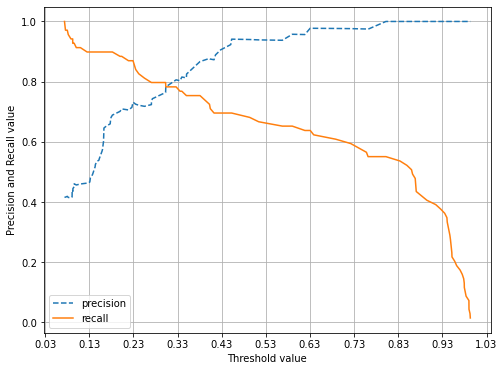

In [95]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )

In [96]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.351, 0.8062)

In [165]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.351
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[72 38]
 [12 57]]
정확도: 0.7207, 정밀도: 0.6000, 재현율: 0.8261, F1_score:  0.826087


## 6-2. RandomizedSearchCV

In [98]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [99]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   16.2s


LGBMClassifier(bootstrap=True, max_depth=None, max_features='sqrt',
               min_samples_leaf=2, min_samples_split=10, n_estimators=200)


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.8s finished


In [100]:
lgb_random_best = LGBMClassifier(bootstrap=True, max_depth=50, max_features='sqrt',
               min_samples_leaf=1, min_samples_split=10, n_estimators=1400)

In [101]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=True, max_depth=50, max_features='sqrt',
               min_samples_leaf=1, min_samples_split=10, n_estimators=1400)

In [102]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[9.99999984e-01 1.58320707e-08]
 [7.66074184e-01 2.33925816e-01]
 [9.99529699e-01 4.70301109e-04]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[9.99999984e-01 1.58320707e-08 9.99999984e-01 1.58320707e-08]
 [7.66074184e-01 2.33925816e-01 7.66074184e-01 2.33925816e-01]
 [9.99529699e-01 4.70301109e-04 9.99529699e-01 4.70301109e-04]]


In [103]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[105   5]
 [ 21  48]]
정확도: 0.8547, 정밀도: 0.9057, 재현율: 0.6957, F1_score:  0.695652


In [104]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###


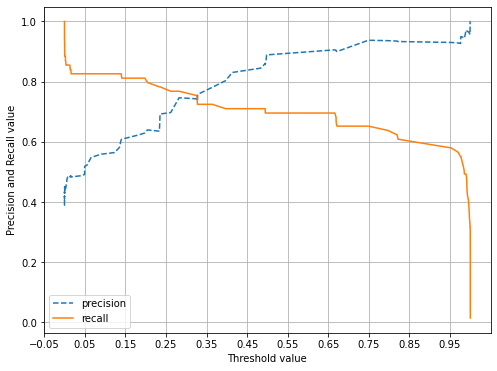

In [105]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [106]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.01)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.5, 0.7869)

In [107]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[105   5]
 [ 21  48]]
정확도: 0.8547, 정밀도: 0.9057, 재현율: 0.6957, F1_score:  0.695652


## 6-3. BaysianOptimization

In [112]:
bayes_params = {
    'num_leaves': (1, 199),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (1, 200),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [113]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [114]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [115]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 85, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 143, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.885639	valid_0's binary_logloss: 0.534156
best_iter: 28
roc_auc: 0.8856389986824771
|  1        |  0.8856   |  0.7744   |  143.3    |  32.12    |  0.05494  |  84.88    |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 113, 'colsample_bytree': 0.98183138025051

params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 40, 'colsample_bytree': 0.8949651533981737, 'subsample': 0.9489380543524266, 'max_depth': 2, 'reg_alpha': 0.14634245076025804, 'reg_lambda': 0.3522969006796076, 'min_split_gain': 0.060521525870239574, 'min_child_weight': 17.55625413484478, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.886495	valid_0's binary_logloss: 0.644886
best_iter: 3
roc_auc: 0.8864953886693017
|  13       |  0.8865   |  0.895    |  2.442    |  17.56    |  0.06052  |  39.89    |  0.1463   |  0.3523   |  0.9489   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 119, 'colsample_bytree': 0.6554150420073348, 'subsample': 0.9070428510477326, 'max_depth': 168, 'reg_alpha': 0.3116863781486092, 'reg_lambda': 0.2242081107031702, 'min_split_gain': 0.08873490442848239, 'min_child_weight': 46.056784622844944, 'verbosity': -1}
Training until validation scor

In [116]:
BO_lgb.max

{'target': 0.8970355731225297,
 'params': {'colsample_bytree': 0.5591372129344666,
  'max_depth': 128.34428324417723,
  'min_child_weight': 11.450897933407088,
  'min_split_gain': 0.09452222278790881,
  'num_leaves': 104.32596770651419,
  'reg_alpha': 0.2073309699952618,
  'reg_lambda': 0.13227780605231348,
  'subsample': 0.8871168447171083}}

In [117]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.849407	valid_0's binary_logloss: 0.659671
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.857576	valid_0's binary_logloss: 0.657223
[3]	valid_0's auc: 0.881555	valid_0's binary_logloss: 0.64903
[4]	valid_0's auc: 0.881028	valid_0's binary_logloss: 0.642099
[5]	valid_0's auc: 0.879315	valid_0's binary_logloss: 0.636227
[6]	valid_0's auc: 0.882872	valid_0's binary_logloss: 0.628555
[7]	valid_0's auc: 0.878788	valid_0's binary_logloss: 0.62288
[8]	valid_0's auc: 0.884453	valid_0's binary_logloss: 0.615636
[9]	valid_0's auc: 0.88643	valid_0's binary_logloss: 0.609004
[10]	valid_0's auc: 0.887418	valid_0's binary_logloss: 0.603591
[11]	valid_0's auc: 0.886957	valid_0's binary_logloss: 0.599107
[12]	valid_0's auc: 0.887879	valid_0's binary_logloss: 0.59267
[13]	valid_0's auc: 0.888142	valid_0's binary_logloss: 0.586475
[14]	valid_0's auc: 0.887615	valid_0's binary_logloss: 0.582145
[15]	valid_0's auc: 0.885837	valid_0's binary_logloss: 

In [118]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.5591372129344666, learning_rate=0.02,
               max_depth=128, min_child_weight=11.450897933407088,
               min_split_gain=0.09452222278790881, n_estimators=1000,
               num_leaves=104, reg_alpha=0.2073309699952618,
               reg_lambda=0.13227780605231348, subsample=0.8871168447171083)

In [119]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.5591372129344666, learning_rate=0.02,
               max_depth=128, min_child_weight=11.450897933407088,
               min_split_gain=0.09452222278790881, n_estimators=1000,
               num_leaves=104, reg_alpha=0.2073309699952618,
               reg_lambda=0.13227780605231348, subsample=0.8871168447171083)

In [120]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.92557576 0.07442424]
 [0.84646393 0.15353607]
 [0.85301871 0.14698129]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.92557576 0.07442424 0.92621433 0.07378567]
 [0.84646393 0.15353607 0.83772652 0.16227348]
 [0.85301871 0.14698129 0.90425811 0.09574189]]


In [121]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108   2]
 [ 21  48]]
정확도: 0.8715, 정밀도: 0.9600, 재현율: 0.6957, F1_score:  0.695652


In [122]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


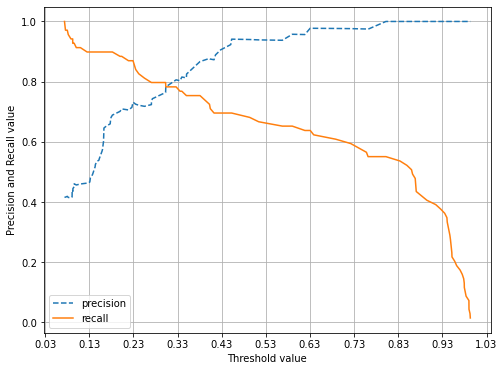

In [123]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [124]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.312, 0.8085)

In [125]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.312
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[95 15]
 [12 57]]
정확도: 0.8492, 정밀도: 0.7917, 재현율: 0.8261, F1_score:  0.826087


# 7. 샘플링기법 적용(오버샘플링) - ADASYN
- ADASYN(Adaptive Synthetic Sampling) 방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [126]:
from imblearn.over_sampling import *

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

# 분류학습시 stratify = target으로 설정해야함.

In [128]:
X_train, y_train = ADASYN(random_state=0).fit_sample(X_train, y_train)

In [129]:
# 추후 오버,언더,하이드리브 샘플링 적용시 레이블 값 분포를 보기위한 코드.

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(869, 24), 테스트 세트 Shape:(179, 24)
 학습 세트 레이블 값 분포 비율
0    0.505178
1    0.494822
Name: Survived, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.614525
1    0.385475
Name: Survived, dtype: float64


# 7-1. GridsearchCV

In [130]:
from sklearn.model_selection import GridSearchCV

params = {'num_leaves': [32, 64],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


gridcv = GridSearchCV(lgbm_clf, param_grid=params, verbose=3, n_jobs=-1, cv=3)

In [131]:
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="f1",
           eval_set=[(X_train, y_train), (X_test, y_test)])

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s


[1]	training's binary_logloss: 0.669271	valid_1's binary_logloss: 0.666905
Training until validation scores don't improve for 30 rounds
[2]	training's binary_logloss: 0.649889	valid_1's binary_logloss: 0.64752
[3]	training's binary_logloss: 0.630738	valid_1's binary_logloss: 0.629782
[4]	training's binary_logloss: 0.614912	valid_1's binary_logloss: 0.615229
[5]	training's binary_logloss: 0.603536	valid_1's binary_logloss: 0.603883
[6]	training's binary_logloss: 0.593627	valid_1's binary_logloss: 0.593605
[7]	training's binary_logloss: 0.585558	valid_1's binary_logloss: 0.585619
[8]	training's binary_logloss: 0.576646	valid_1's binary_logloss: 0.577867
[9]	training's binary_logloss: 0.570863	valid_1's binary_logloss: 0.572234
[10]	training's binary_logloss: 0.564142	valid_1's binary_logloss: 0.56657
[11]	training's binary_logloss: 0.55998	valid_1's binary_logloss: 0.562612
[12]	training's binary_logloss: 0.554859	valid_1's binary_logloss: 0.558458
[13]	training's binary_logloss: 0.55174

[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.8s finished


GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=400), n_jobs=-1,
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]},
             verbose=3)

In [132]:
gridcv.best_estimator_

LGBMClassifier(max_depth=128, min_child_samples=100, n_estimators=400,
               num_leaves=32, subsample=0.8)

In [133]:
lgbm_clf_best = LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=32, subsample=0.8)

In [134]:
lgbm_clf_best.fit(X_train, y_train)

LGBMClassifier(max_depth=128, min_child_samples=60, n_estimators=400,
               num_leaves=32, subsample=0.8)

In [135]:
##

pred_proba = lgbm_clf_best.predict_proba(X_test)
pred  = lgbm_clf_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.75131076 0.24868924]
 [0.85000112 0.14999888]
 [0.20276547 0.79723453]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.75131076 0.24868924 0.75131076 0.24868924]
 [0.85000112 0.14999888 0.85000112 0.14999888]
 [0.20276547 0.79723453 0.20276547 0.79723453]]


In [136]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[77 33]
 [17 52]]
정확도: 0.7207, 정밀도: 0.6118, 재현율: 0.7536, F1_score:  0.753623


In [137]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_best.predict_proba(X_test)[:, 1] 


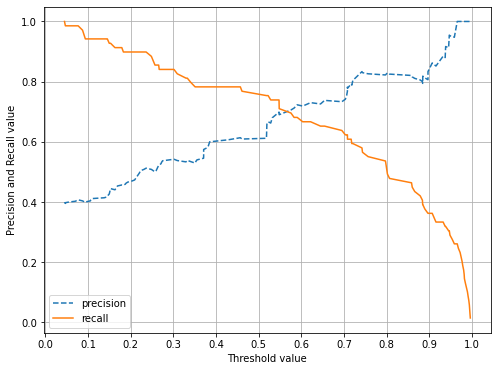

In [138]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] )


In [139]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_best, X_test, y_test)

(0.533, 0.7183)

In [140]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.533
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[88 22]
 [18 51]]
정확도: 0.7765, 정밀도: 0.6986, 재현율: 0.7391, F1_score:  0.739130


# 7-2. RandomizedSearchCV

In [141]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [142]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

lg_cl = LGBMClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   30.1s finished


LGBMClassifier(bootstrap=True, max_depth=10, max_features='sqrt',
               min_samples_leaf=1, min_samples_split=10, n_estimators=1000)


In [143]:
lgb_random_best = LGBMClassifier(bootstrap=True, max_depth=20, max_features='auto',
               min_samples_leaf=1, min_samples_split=2, n_estimators=2000)

In [144]:
lgb_random_best.fit(X_train, y_train)

LGBMClassifier(bootstrap=True, max_depth=20, max_features='auto',
               min_samples_leaf=1, min_samples_split=2, n_estimators=2000)

In [145]:
## 1 ##

pred_proba = lgb_random_best.predict_proba(X_test)
pred  = lgb_random_best.predict_proba(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.99189779 0.00810221]
 [0.86341579 0.13658421]
 [0.00159966 0.99840034]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.99189779 0.00810221 0.99189779 0.00810221]
 [0.86341579 0.13658421 0.86341579 0.13658421]
 [0.00159966 0.99840034 0.00159966 0.99840034]]


In [146]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[82 28]
 [18 51]]
정확도: 0.7430, 정밀도: 0.6456, 재현율: 0.7391, F1_score:  0.739130


In [147]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgb_random_best.predict_proba(X_test)[:, 1] ###


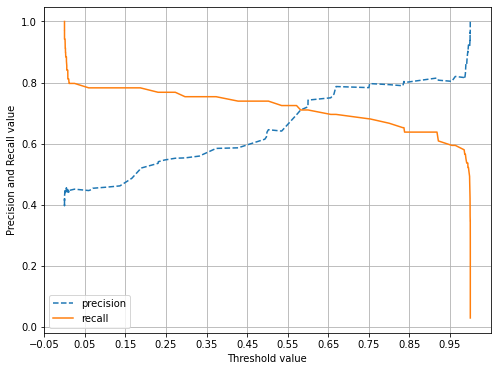

In [148]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgb_random_best.predict_proba(X_test)[:, 1]) ##


In [149]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgb_random_best, X_test, y_test)

(0.667, 0.7385)

In [150]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.667
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 13]
 [21 48]]
정확도: 0.8101, 정밀도: 0.7869, 재현율: 0.6957, F1_score:  0.695652


# 7-3. BaysianOptimization

In [151]:
bayes_params = {
    'num_leaves': (1, 100),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (1, 200),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [152]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds
    
    

In [153]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [154]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 43, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 143, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.796113	valid_0's binary_logloss: 0.677285
best_iter: 3
roc_auc: 0.7961133069828722
|  1        |  0.7961   |  0.7744   |  143.3    |  32.12    |  0.05494  |  42.94    |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 57, 'colsample_bytree': 0.9818313802505146,

params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 95, 'colsample_bytree': 0.6607015732493655, 'subsample': 0.5399356922329321, 'max_depth': 116, 'reg_alpha': 0.12052453981853983, 'reg_lambda': 0.43865131164827, 'min_split_gain': 0.004685462961493013, 'min_child_weight': 6.732823465575059, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[100]	valid_0's auc: 0.840053	valid_0's binary_logloss: 0.528284
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.840448	valid_0's binary_logloss: 0.528436
best_iter: 99
roc_auc: 0.8404479578392622
|  13       |  0.8404   |  0.6607   |  116.0    |  6.733    |  0.004685 |  95.47    |  0.1205   |  0.4387   |  0.5399   |
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 93, 'colsample_bytree': 0.6791021262823287, 'subsample': 0.5813619852448733, 'max_depth': 110, 'reg_alpha': 0.22369350064006893, 'reg_lambda': 0.1441936971427692, 'min_split_gain': 0.0710309870165746, 'min_chi

In [155]:
BO_lgb.max

{'target': 0.8532938076416337,
 'params': {'colsample_bytree': 0.9209814903842845,
  'max_depth': 118.47670789666758,
  'min_child_weight': 5.0,
  'min_split_gain': 0.005088767484726971,
  'num_leaves': 76.26078332684591,
  'reg_alpha': 0.45769107844813145,
  'reg_lambda': 0.3680174104044492,
  'subsample': 1.0}}

In [156]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf_bayes_best = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf_bayes_best.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_bayes_best.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.814822	valid_0's binary_logloss: 0.684945
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.805468	valid_0's binary_logloss: 0.680232
[3]	valid_0's auc: 0.823057	valid_0's binary_logloss: 0.674347
[4]	valid_0's auc: 0.830435	valid_0's binary_logloss: 0.668679
[5]	valid_0's auc: 0.837681	valid_0's binary_logloss: 0.663452
[6]	valid_0's auc: 0.830567	valid_0's binary_logloss: 0.659036
[7]	valid_0's auc: 0.833004	valid_0's binary_logloss: 0.654755
[8]	valid_0's auc: 0.834848	valid_0's binary_logloss: 0.649966
[9]	valid_0's auc: 0.84025	valid_0's binary_logloss: 0.645217
[10]	valid_0's auc: 0.839855	valid_0's binary_logloss: 0.640492
[11]	valid_0's auc: 0.840514	valid_0's binary_logloss: 0.635984
[12]	valid_0's auc: 0.846113	valid_0's binary_logloss: 0.631434
[13]	valid_0's auc: 0.842029	valid_0's binary_logloss: 0.62734
[14]	valid_0's auc: 0.841765	valid_0's binary_logloss: 0.623271
[15]	valid_0's auc: 0.839921	valid_0's binary_logloss

In [157]:
lgbm_clf_bayes_best

LGBMClassifier(colsample_bytree=0.9209814903842845, learning_rate=0.02,
               max_depth=118, min_child_weight=5.0,
               min_split_gain=0.005088767484726971, n_estimators=1000,
               num_leaves=76, reg_alpha=0.45769107844813145,
               reg_lambda=0.3680174104044492)

In [158]:
lgbm_clf_bayes_best.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.9209814903842845, learning_rate=0.02,
               max_depth=118, min_child_weight=5.0,
               min_split_gain=0.005088767484726971, n_estimators=1000,
               num_leaves=76, reg_alpha=0.45769107844813145,
               reg_lambda=0.3680174104044492)

In [159]:
## 1 ##

pred_proba = lgbm_clf_bayes_best.predict_proba(X_test) ##
pred  = lgbm_clf_best.predict_proba(X_test) ##
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,2)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.76013617 0.23986383]
 [0.78529063 0.21470937]
 [0.30530589 0.69469411]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.76013617 0.23986383 0.75131076 0.24868924]
 [0.78529063 0.21470937 0.85000112 0.14999888]
 [0.30530589 0.69469411 0.20276547 0.79723453]]


In [160]:
## 2

from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[85 25]
 [14 55]]
정확도: 0.7821, 정밀도: 0.6875, 재현율: 0.7971, F1_score:  0.797101


In [161]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lgbm_clf_bayes_best.predict_proba(X_test)[:, 1] ###


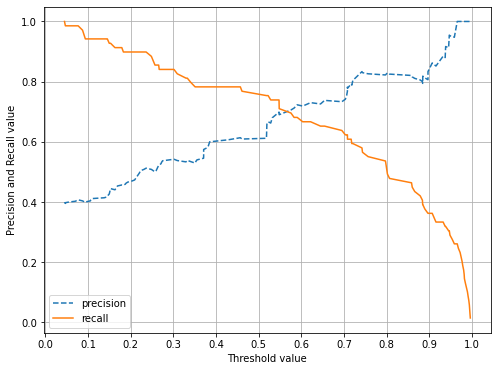

In [162]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lgbm_clf_best.predict_proba(X_test)[:, 1] ) ####


In [163]:
def Find_threshold(model, X_test, y_test):
    thresholds = np.arange(0,1,0.001)
    threshold_count = []
    pred_proba=model.predict_proba(X_test)
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])

    MAX=thresholds[np.array(threshold_count)[:,1].argmax()]
    
    thresholds = np.arange(MAX-0.05,MAX+0.05,0.005)
    threshold_count = []
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        model_cl_pred = binarizer.transform(pred_proba_1)
        #threshold_count.append([threshold, metrics.f1_score(log_cl_pred, y_test)])
        #print('threshold: {0:.4f}, f1_score: {1:.4f}'.format(threshold,metrics.f1_score(model_cl_pred, y_test)))
        threshold_count.append([threshold, metrics.f1_score(model_cl_pred, y_test)])
    
    return np.round(thresholds[np.array(threshold_count)[:,1].argmax()],4), np.round(metrics.f1_score(Binarizer(threshold=thresholds[np.array(threshold_count)[:,1].argmax()]).transform(pred_proba_1), y_test),4)

Find_threshold(lgbm_clf_bayes_best, X_test, y_test)

(0.618, 0.7556)

In [164]:
# Binarizer의 베스트 threshold 설정값 지정 

custom_threshold = 0.618
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[95 15]
 [18 51]]
정확도: 0.8156, 정밀도: 0.7727, 재현율: 0.7391, F1_score:  0.739130


# END